In [9]:
# Stop warnings
import warnings
warnings.filterwarnings("ignore")

import os
import sys
import shutil
import cortex
import numpy as np
import nibabel as nb

# Personal imports
sys.path.append("/Users/uriel/disks/meso_H/projects/pRF_analysis/analysis_code/utils")
from pycortex_utils import draw_cortex

In [10]:
subj = 'sub-hcp32k'
cx_subject = subj
main_dir = '/Users/uriel/disks/meso_shared'
project_dir = 'RetinoMaps'
surf_in = '/Users/uriel/Desktop/100610/MNINonLinear/fsaverage_LR32k'

# Create HCP 32k pycortex subject

In [3]:
# Make pycortex subject
cortex.db.make_subj('sub-hcp32k')

In [4]:
surf_out = os.path.join(cortex.db.filestore, subj, 'surfaces')
os.makedirs(surf_out, exist_ok=True)

In [5]:
def copy_surface(fname_in, fname_out):
    """Copie un fichier surface si il existe, sinon avertit"""
    if os.path.exists(fname_in):
        shutil.copy(fname_in, fname_out)
        print(f"Copié: {fname_in} -> {fname_out}")
    else:
        print(f" Fichier manquant: {fname_in}")

In [6]:
# wm (white matter)
copy_surface(os.path.join(surf_in, '100610.L.white_MSMAll.32k_fs_LR.surf.gii'), os.path.join(surf_out, 'wm_lh.gii'))
copy_surface(os.path.join(surf_in, '100610.R.white_MSMAll.32k_fs_LR.surf.gii'), os.path.join(surf_out, 'wm_rh.gii'))

# pia (pial)
copy_surface(os.path.join(surf_in, '100610.L.pial_MSMAll.32k_fs_LR.surf.gii'), os.path.join(surf_out, 'pia_lh.gii'))
copy_surface(os.path.join(surf_in, '100610.R.pial_MSMAll.32k_fs_LR.surf.gii'), os.path.join(surf_out, 'pia_rh.gii'))

# inflated
copy_surface(os.path.join(surf_in, '100610.L.inflated_MSMAll.32k_fs_LR.surf.gii'), os.path.join(surf_out, 'inflated_lh.gii'))
copy_surface(os.path.join(surf_in, '100610.R.inflated_MSMAll.32k_fs_LR.surf.gii'), os.path.join(surf_out, 'inflated_rh.gii'))

# flat
copy_surface(os.path.join(surf_in, '100610.L.flat.32k_fs_LR.surf.gii'), os.path.join(surf_out, 'flat_lh.gii'))
copy_surface(os.path.join(surf_in, '100610.R.flat.32k_fs_LR.surf.gii'), os.path.join(surf_out, 'flat_rh.gii'))

Copié: /Users/uriel/Desktop/100610/MNINonLinear/fsaverage_LR32k/100610.L.white_MSMAll.32k_fs_LR.surf.gii -> /Users/uriel/disks/meso_shared/RetinoMaps/derivatives/pp_data/cortex/db/sub-hcp32k/surfaces/wm_lh.gii
Copié: /Users/uriel/Desktop/100610/MNINonLinear/fsaverage_LR32k/100610.R.white_MSMAll.32k_fs_LR.surf.gii -> /Users/uriel/disks/meso_shared/RetinoMaps/derivatives/pp_data/cortex/db/sub-hcp32k/surfaces/wm_rh.gii
Copié: /Users/uriel/Desktop/100610/MNINonLinear/fsaverage_LR32k/100610.L.pial_MSMAll.32k_fs_LR.surf.gii -> /Users/uriel/disks/meso_shared/RetinoMaps/derivatives/pp_data/cortex/db/sub-hcp32k/surfaces/pia_lh.gii
Copié: /Users/uriel/Desktop/100610/MNINonLinear/fsaverage_LR32k/100610.R.pial_MSMAll.32k_fs_LR.surf.gii -> /Users/uriel/disks/meso_shared/RetinoMaps/derivatives/pp_data/cortex/db/sub-hcp32k/surfaces/pia_rh.gii
Copié: /Users/uriel/Desktop/100610/MNINonLinear/fsaverage_LR32k/100610.L.inflated_MSMAll.32k_fs_LR.surf.gii -> /Users/uriel/disks/meso_shared/RetinoMaps/derivat

In [7]:
anat_in = '/Users/uriel/Desktop/100610/T1w/T1w_acpc_dc_restore.nii.gz'
anat_out = os.path.join(cortex.db.filestore, subj, 'anatomicals', 'raw.nii.gz')
os.makedirs(os.path.dirname(anat_out), exist_ok=True)
shutil.copy(anat_in, anat_out)
print(f"Anatomique copié: {anat_in} -> {anat_out}")

Anatomique copié: /Users/uriel/Desktop/100610/T1w/T1w_acpc_dc_restore.nii.gz -> /Users/uriel/disks/meso_shared/RetinoMaps/derivatives/pp_data/cortex/db/sub-hcp32k/anatomicals/raw.nii.gz


In [12]:
# Load brain mask
mask_32k_L_fn = '/Users/uriel/Desktop/100610/MNINonLinear/fsaverage_LR32k/100610.L.atlasroi.32k_fs_LR.shape.gii'
mask_32k_L_img = nb.load(mask_32k_L_fn)
mask_32k_L_data = mask_32k_L_img.darrays[0].data
n_vert_32k_L = mask_32k_L_data.shape[0]

mask_32k_R_fn = '/Users/uriel/Desktop/100610/MNINonLinear/fsaverage_LR32k/100610.R.atlasroi.32k_fs_LR.shape.gii'
mask_32k_R_img = nb.load(mask_32k_R_fn)
mask_32k_R_data = mask_32k_R_img.darrays[0].data
n_vert_32k_R = mask_32k_R_data.shape[0]

mask_64k_brain_data = np.concatenate([mask_32k_L_data, mask_32k_R_data])

# # Load sulcaldepth
# sulc_59k_brain_fn = "/Users/uriel/Desktop/100610/MNINonLinear/fsaverage_LR32k/100610.sulc_MSMAll.32k_fs_LR.dscalar.nii"
# sulc_59k_brain_img = nb.load(sulc_59k_brain_fn)
# sulc_59k_brain_data = sulc_59k_brain_img.get_fdata().squeeze()

# # make 64k sulcaldepth
# sulc_64k_brain_data = np.zeros_like(mask_64k_brain_data)
# sulc_64k_brain_data[mask_64k_brain_data == 1] = sulc_59k_brain_data

# sulc_dict = {'left' : sulc_64k_brain_data[:n_vert_32k_L], 
#              'right' : sulc_64k_brain_data[n_vert_32k_L:]}

# # save npz 
# np.savez('{}/{}/surface-info/sulcaldepth.npz'.format(cortex.db.filestore, subj), **sulc_dict)


In [14]:
mask_dict = {'left' : mask_32k_L_data.astype(int).astype(bool), 
             'right' : mask_32k_L_data.astype(int).astype(bool)}

In [16]:
np.savez('/Users/uriel/Downloads/test.npz', **mask_dict)

In [13]:
surfs = [cortex.polyutils.Surface(*d) for d in cortex.db.get_surf(cx_subject, "fiducial")]
num_verts = surfs[0].pts.shape[0] + surfs[1].pts.shape[0]
rand_data = np.random.randn(num_verts)
vertex_data = cortex.Vertex(rand_data, cx_subject)
ds = cortex.Dataset(rand=vertex_data)


temp_dir = "{}/{}/derivatives/temp_data/{}_rand_ds/".format(main_dir, project_dir, cx_subject)
cortex.webgl.make_static(outpath=temp_dir, data=ds)


Generating new ctm file...
wm
wm
Generating curvature surface info...
inflated
inflated
Create new file: /Users/uriel/disks/meso_shared/RetinoMaps/derivatives/pp_data/cortex/db/sub-hcp32k/overlays.svg
Generating a flatmap cache
Generating thickness surface info...


In [19]:
surfs[1].pts.shape[0]

32492

# Project MMP on 32k subject

https://balsa.wustl.edu/DLabel/Brp5

https://balsa.wustl.edu/976l8

In [5]:
# Charger le fichier
dlabel_file = '/Users/uriel/Downloads/Fig_S2_7q_kKM0 3/Balsa/Fig_S2/HCP_MMP1.0_Glasser.32k_fs_LR.dlabel.nii'
dlabel = nb.load(dlabel_file)
# Numéro de label pour chaque vertex
label_data = dlabel.get_fdata().squeeze()


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


In [6]:
colormap_name = 'HCP_MMP1'

In [7]:
new_labels = ((label_64k - 1) % 180) + 1

NameError: name 'label_64k' is not defined

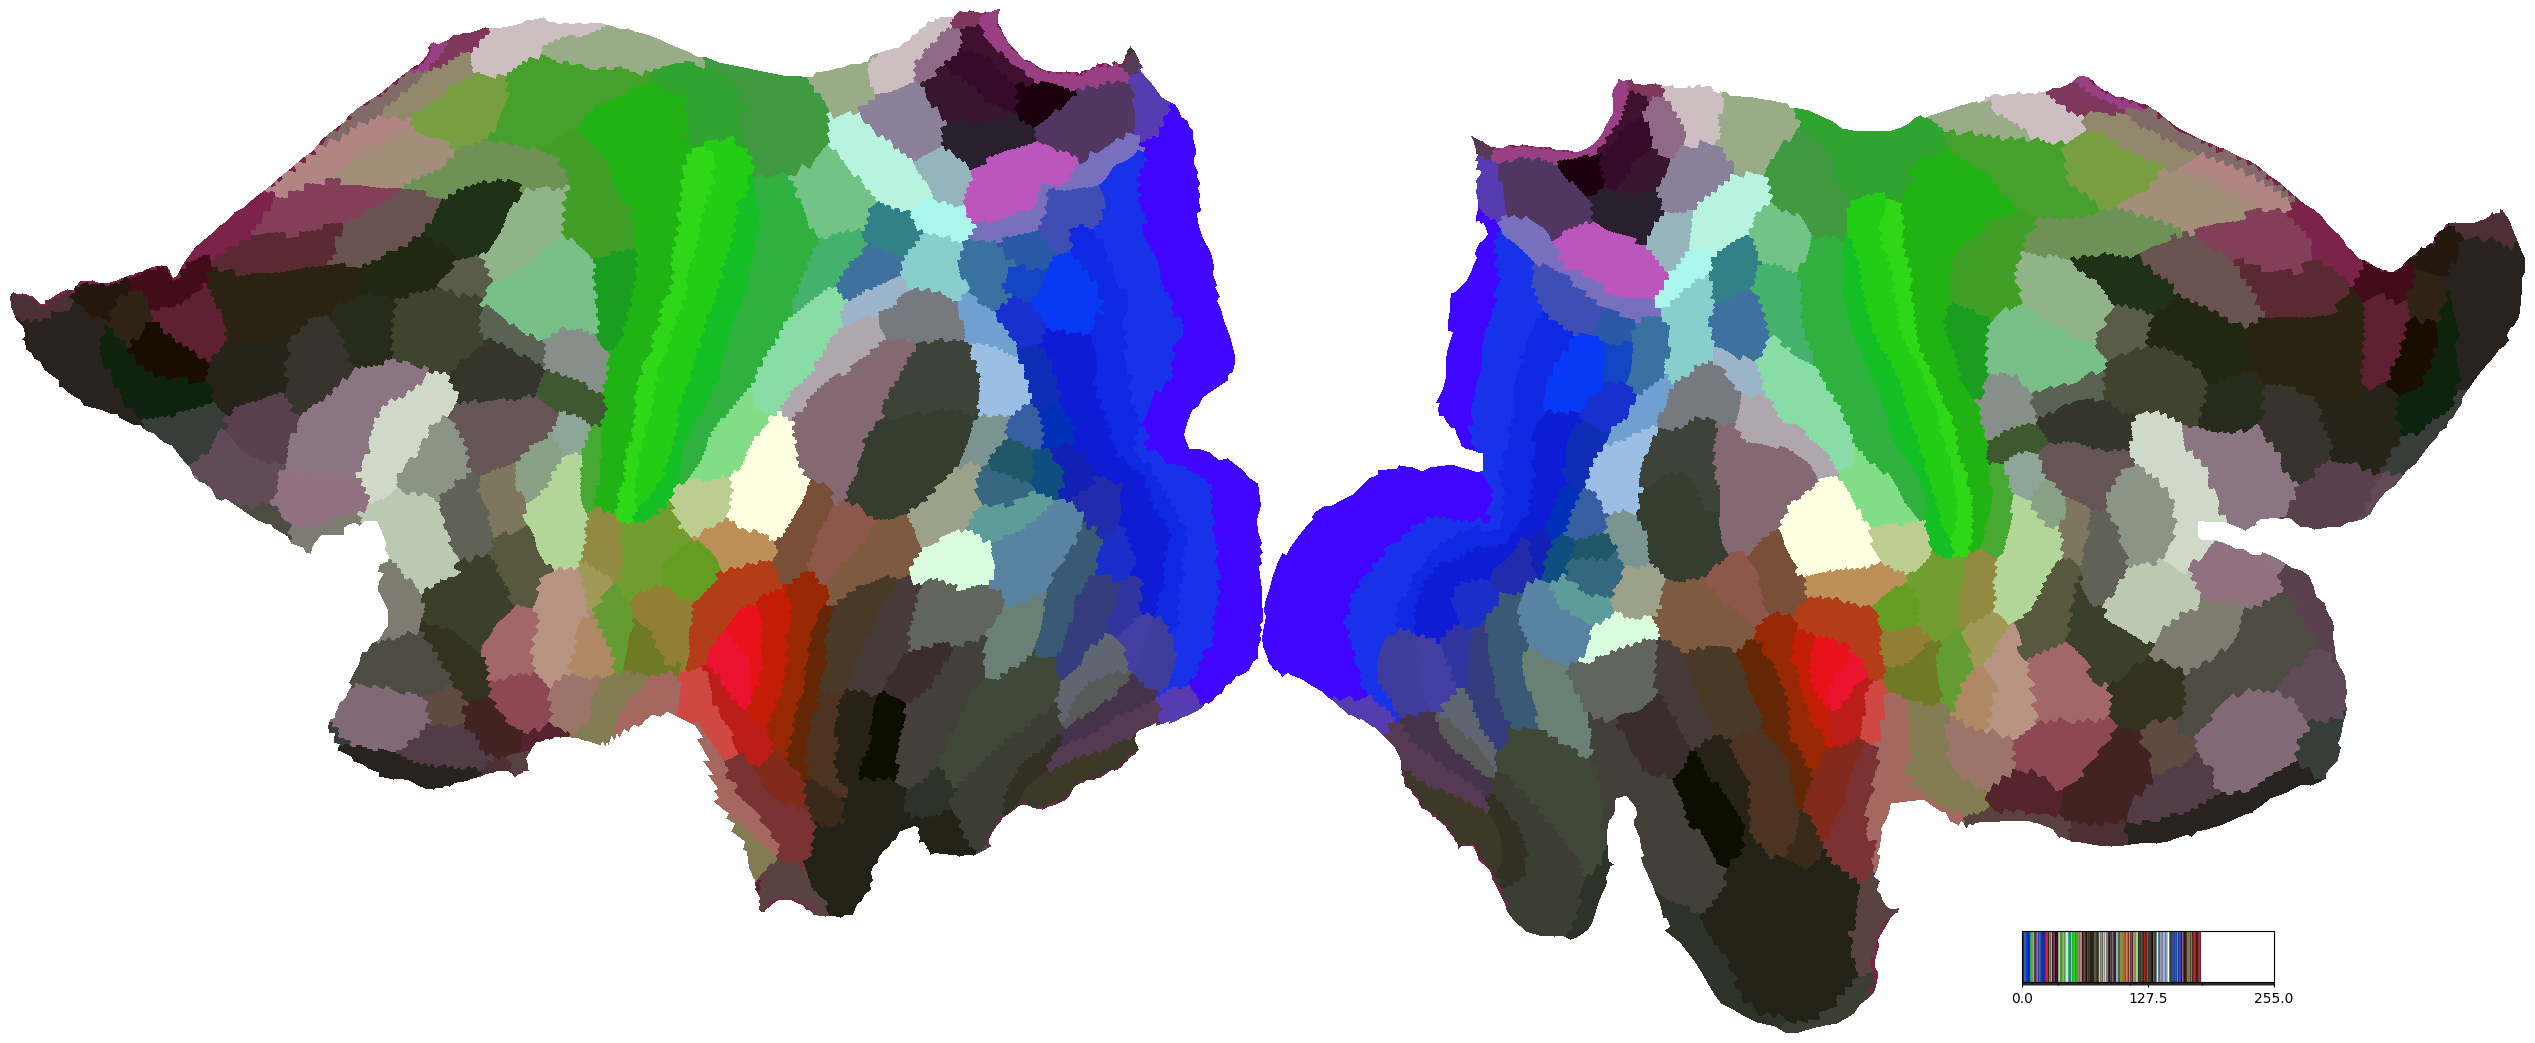

In [43]:
a = np.ones(new_labels.shape)
roi_name = 'mmp_fsnayive'
param_rois = {'subject': subj,
              'data': new_labels, 
              'cmap': colormap_name,
              'alpha': a,
              # 'alpha': deriv_mat,
              'cbar': 'discrete', 
              'vmin': 0,
              'vmax': 255,
              'cmap_steps': 255,
              'cortex_type': 'VertexRGB',
              'description': 'Gaussian pRF ROIs',
              'curv_brightness': 1, 
              'curv_contrast': 0.25,
              'add_roi': False,
              'with_labels': True,
              'roi_name': roi_name}

# Plot
volume_roi = draw_cortex(**param_rois)

In [51]:
label_data.shape

(29696,)

In [3]:
import nibabel as nib




In [5]:
label_64k = np.zeros_like(data_brain)

# Remplir uniquement là où data_brain == 1
label_64k[data_brain == 1] = label_data

NameError: name 'label_data' is not defined

pixdim[1,2,3] should be non-zero; setting 0 dims to 1


In [12]:
sulc_64k = np.zeros_like(data_brain)

# Remplir uniquement là où data_brain == 1
sulc_64k[data_brain == 1] = data_sulc

NameError: name 'plt' is not defined

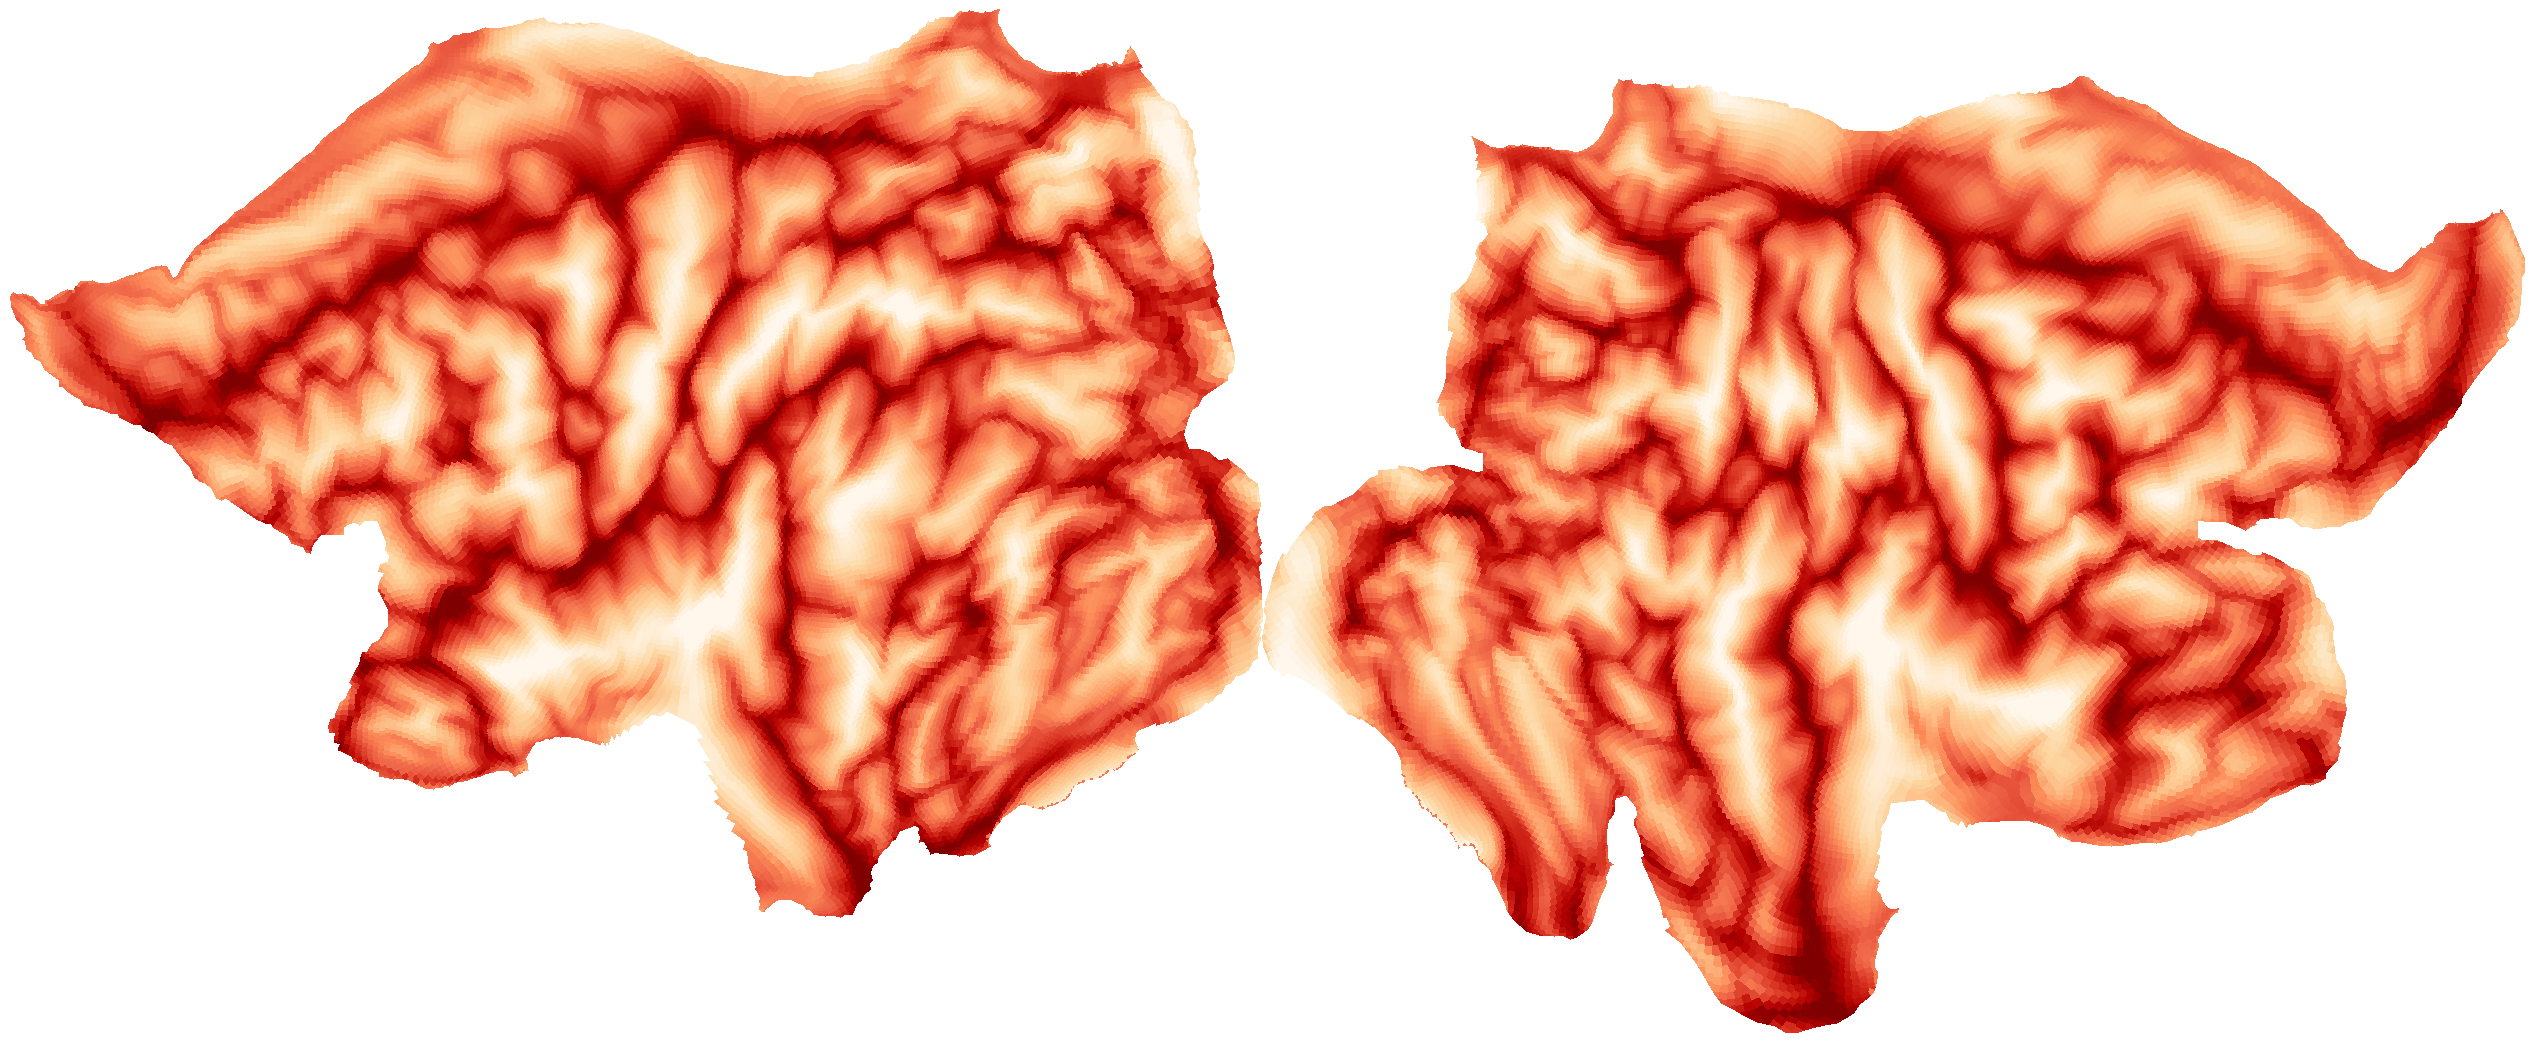

In [14]:
vertex_data = cortex.Vertex(sulc_64k, subj, cmap='OrRd')

cortex.quickshow(vertex_data, with_colorbar=False)
# plt.title("MMP atlas", fontsize=25)
# plt.savefig('/Users/uriel/Downloads/mmp_atlas.pdf')
plt.show()

In [3]:
rois_dict_59k = dict(np.load('/Users/uriel/Desktop/hcp_999999/surface-info/sulcaldepth.npz'))

In [5]:
rois_dict_59k['left']

array([-0.08520664, -0.0621077 ,  0.5316052 , ...,  0.13573751,
        0.1577287 ,  0.13175605], shape=(59292,), dtype=float32)

In [6]:
rois_dict_59k['right']

array([-0.08520664, -0.0621077 ,  0.5316052 , ...,  0.13573751,
        0.1577287 ,  0.13175605], shape=(59292,), dtype=float32)